In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [2]:
os.chdir('C:/Users/POZOLE/Documents/pp/nohtyp/practice_algo_trading/datos_master')
data = pd.read_csv('datos_sup_multiclase.csv')

# Cargar los datos
df = data.copy()


In [3]:
import ta

# Suponiendo que ya tienes un DataFrame `df` con las columnas 'open', 'high', 'low', 'close', 'volume'

# Calcular el RSI
df['rsi'] = ta.momentum.RSIIndicator(df['close'], window=14).rsi()

# Calcular el Estocástico
df['stoch'] = ta.momentum.StochasticOscillator(df['high'], df['low'], df['close'], window=14, smooth_window=3).stoch()

williams_r_indicator = ta.momentum.WilliamsRIndicator(df['high'], df['low'], df['close'])
df['williams_r'] = williams_r_indicator.williams_r()

# Calcular el MFI
df['mfi'] = ta.volume.MFIIndicator(df['high'], df['low'], df['close'], df['volume'], window=14).money_flow_index()


# Calcular Aroon Up y Aroon Down
aroon_indicator = ta.trend.AroonIndicator(df['high'], df['low'], window=14)
df['aroon_up'], df['aroon_down'] = aroon_indicator.aroon_up(), aroon_indicator.aroon_down()

# Calcular el CMF
df['cmf'] = ta.volume.ChaikinMoneyFlowIndicator(df['high'], df['low'], df['close'], df['volume'], window=20).chaikin_money_flow()


# Calcular Stochastic RSI
stoch_rsi_indicator = ta.momentum.rsi(df['close'], window=14)
df['stoch_rsi'] = stoch_rsi_indicator

# Calcular el CCI
df['cci'] = ta.trend.CCIIndicator(df['high'], df['low'], df['close'], window=14).cci()

# Ahora puedes revisar el DataFrame con los indicadores calculados
print(df.head())



         date      open      high       low     close       volume symbol  \
0  07/08/2022  22951.20  23396.97  22850.00  23177.58   890.846902    btc   
1  08/08/2022  23177.58  24240.60  23159.87  23815.45  2284.475576    btc   
2  09/08/2022  23815.45  23926.69  22875.00  23150.39  1956.630895    btc   
3  10/08/2022  23150.39  24221.92  22664.06  23952.14  3440.139455    btc   
4  11/08/2022  23952.14  24920.00  23857.13  23935.04  3553.309597    btc   

   rsi        macd        adx  ...         vwap  signal  stoch  williams_r  \
0  NaN  601.214957   0.000000  ...  22953.02117       b    NaN         NaN   
1  NaN  626.217164  33.198505  ...  23111.91657       h    NaN         NaN   
2  NaN  585.616191  33.041706  ...  23287.71403       s    NaN         NaN   
3  NaN  611.089887  33.143794  ...  23439.04848       b    NaN         NaN   
4  NaN  622.719822  33.769644  ...  23506.62669       s    NaN         NaN   

   mfi  aroon_up  aroon_down  cmf stoch_rsi  cci  
0  NaN       NaN 

Epoch 1/10


c:\Users\POZOLE\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.6511 - loss: 0.8582 - val_accuracy: 0.7883 - val_loss: 0.6583
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7852 - loss: 0.6619 - val_accuracy: 0.7883 - val_loss: 0.6513
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7890 - loss: 0.6482 - val_accuracy: 0.7883 - val_loss: 0.6394
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8025 - loss: 0.6108 - val_accuracy: 0.7883 - val_loss: 0.6116
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7988 - loss: 0.5853 - val_accuracy: 0.7883 - val_loss: 0.5640
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7817 - loss: 0.5706 - val_accuracy: 0.7871 - val_loss: 0.5476
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7799 - loss: 0.5541 - val_accuracy: 0.7883 - val_loss: 0.5319
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7874 - loss: 0.5211 - val_accuracy: 0.7883 - val_loss: 0.

c:\Users\POZOLE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\POZOLE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\POZOLE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

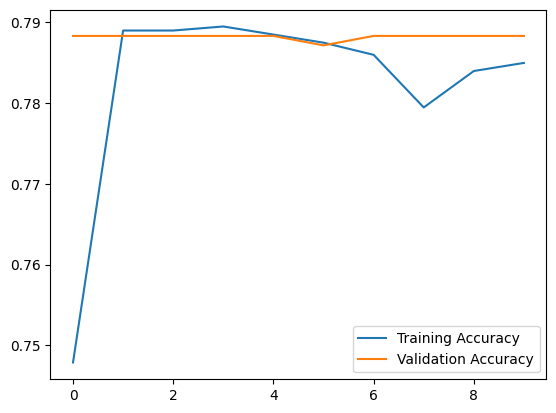

In [23]:
from sklearn.preprocessing import LabelEncoder

features = [ 'rsi', 'macd', 'adx', 'adp', 'adm', 'dri',
            'dlogri', 'avgtr', 'donch_hband', 'donch_lband', 'vwap']

target = ['signal']

# Step 1: Encode the target variable (signal)
encoder = LabelEncoder()

# Fit the encoder and transform the target variable into integers
df['signal'] = encoder.fit_transform(df['signal'])

# Now, proceed with creating sequences and splitting the data
X, y = create_sequences(df, features, target)

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 2: Normalize the features
scaler = StandardScaler()
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])  # Reshaping for LSTM input
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Normalize each feature (for LSTM)
for i in range(X_train.shape[2]):
    X_train[:, :, i] = scaler.fit_transform(X_train[:, :, i])
    X_test[:, :, i] = scaler.transform(X_test[:, :, i])

# Step 3: Define the LSTM Model (same as before)
model = Sequential()

# LSTM Layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout for regularization

# Another LSTM Layer (optional for deeper models)
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Fully connected layer (Dense layer)
model.add(Dense(units=3, activation='softmax'))  # 3 outputs: Buy, Sell, Hold

# Step 4: Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Step 7: Predicting Signals (Buy, Sell, Hold)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Step 8: Post-training analysis and evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))

# Step 9: Optional - Visualize training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [30]:
# Ahora probemos con nuevos datos ajenos al modelo para ver como se desempeña

os.chdir('C:/Users/POZOLE/Documents/pp/nohtyp/practice_algo_trading/modelos_dummys_ver5.0')
data_2 = pd.read_csv('datos_sol.csv')

# Cargar los datos
df_2 = data_2.copy()

In [31]:
import ta

# Suponiendo que ya tienes un DataFrame `df_2` con las columnas 'open', 'high', 'low', 'close', 'volume'

# Calcular el RSI
df_2['rsi'] = ta.momentum.RSIIndicator(df_2['close'], window=14).rsi()

# Calcular el Estocástico
df_2['stoch'] = ta.momentum.StochasticOscillator(df_2['high'], df_2['low'], df_2['close'], window=14, smooth_window=3).stoch()

williams_r_indicator = ta.momentum.WilliamsRIndicator(df_2['high'], df_2['low'], df_2['close'])
df_2['williams_r'] = williams_r_indicator.williams_r()

# Calcular el MFI
df_2['mfi'] = ta.volume.MFIIndicator(df_2['high'], df_2['low'], df_2['close'], df_2['volume'], window=14).money_flow_index()

# Calcular Aroon Up y Aroon Down
aroon_indicator = ta.trend.AroonIndicator(df_2['high'], df_2['low'], window=14)
df_2['aroon_up'], df_2['aroon_down'] = aroon_indicator.aroon_up(), aroon_indicator.aroon_down()

# Calcular el CMF
df_2['cmf'] = ta.volume.ChaikinMoneyFlowIndicator(df_2['high'], df_2['low'], df_2['close'], df_2['volume'], window=20).chaikin_money_flow()

# Calcular Stochastic RSI
stoch_rsi_indicator = ta.momentum.rsi(df_2['close'], window=14)
df_2['stoch_rsi'] = stoch_rsi_indicator

# Calcular el CCI
df_2['cci'] = ta.trend.CCIIndicator(df_2['high'], df_2['low'], df_2['close'], window=14).cci()



In [33]:
# Let's assume you have new data in a DataFrame `df_2`
# It should have the same structure as the original data, containing the same feature columns.

df_2 = df_2[features]  # Ensure the new data has the same features as training data

# 2. Normalize the new data using the same scaler that was fitted on the training data
# Here, we assume 'scaler' was already fitted during training
df_2_scaled = scaler.transform(df_2)

# 3. Create sequences for LSTM (if you're using time series data with sequences)
# Ensure the sequence length matches what you used during training (e.g., 50)
window_size = 50
X_new = []

for i in range(window_size, len(df_2_scaled)):
    X_new.append(df_2_scaled[i-window_size:i])

X_new = np.array(X_new)

# 4. Reshape the data for LSTM input (LSTM expects input shape: [samples, time steps, features])
X_new = X_new.reshape(X_new.shape[0], X_new.shape[1], X_new.shape[2])

# 5. Predict the signal (Buy, Sell, Hold) using the trained model
predictions = model.predict(X_new)

# 6. Convert the predictions to class labels (0=Buy, 1=Sell, 2=Hold)
predicted_classes = np.argmax(predictions, axis=1)

# 7. Map predicted classes to their respective labels (if needed)
signal_labels = encoder.inverse_transform(predicted_classes)

# 8. Print or use the predicted signals
print(signal_labels)



c:\Users\POZOLE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


ValueError: X has 11 features, but StandardScaler is expecting 50 features as input.

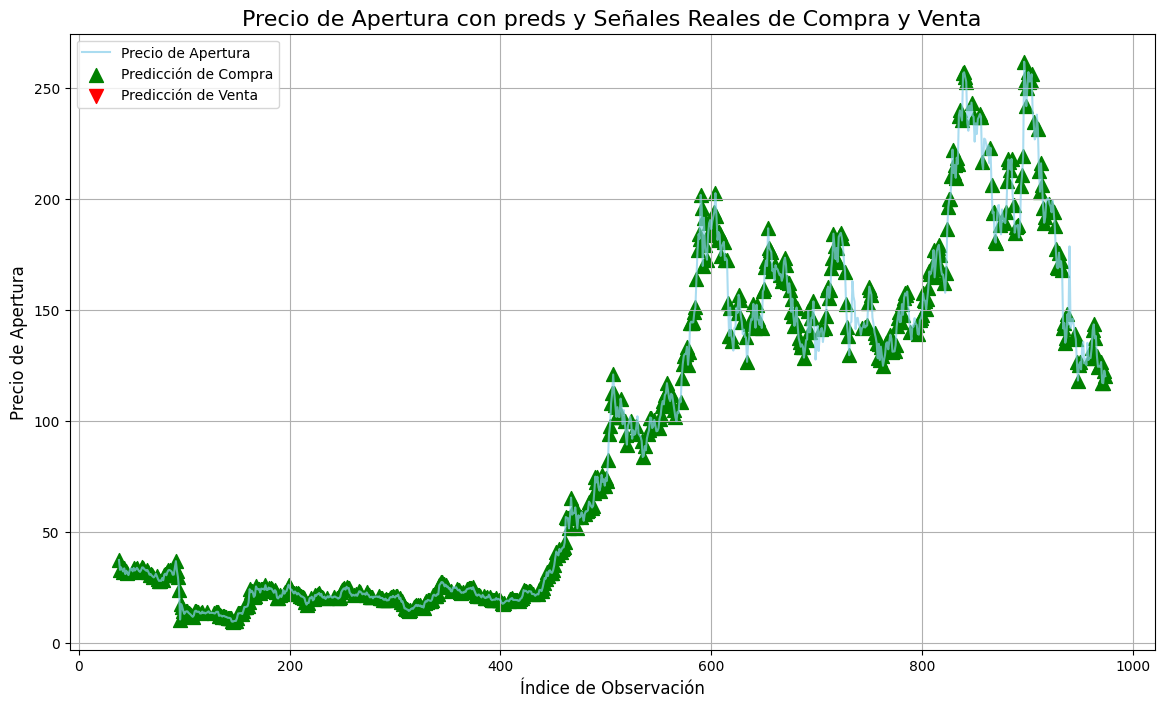

In [13]:
import matplotlib.pyplot as plt

# Crear gráfico de precios
plt.figure(figsize=(14, 8))
plt.plot(df_2['open'], label='Precio de Apertura', color='skyblue', alpha=0.7)

# Añadir señales de predicción de compra y venta
plt.scatter(df_2.index[df_2['preds'] == "b"], df_2['open'][df_2['preds'] == "b"], 
            marker='^', color='green', label='Predicción de Compra', alpha=1, s=100)
plt.scatter(df_2.index[df_2['preds'] == "s"], df_2['open'][df_2['preds'] == "s"], 
            marker='v', color='red', label='Predicción de Venta', alpha=1, s=100)


# Personalización del gráfico
plt.title('Precio de Apertura con preds y Señales Reales de Compra y Venta', fontsize=16)
plt.xlabel('Índice de Observación', fontsize=12)
plt.ylabel('Precio de Apertura', fontsize=12)
plt.legend(loc='best')
plt.grid(True)

# Mostrar gráfico
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report

# Supón que tienes un DataFrame df con tus características y la columna 'signal' como variable objetivo

# Definir las columnas predictoras y la variable objetivo
features = ['williams_r', 'cci', 'dri', 'dlogri']
target = 'signal'

# Eliminar valores nulos
df = df.dropna()

# Separar las variables predictoras y la variable objetivo
X = df[features]
y = df[target]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Definir y entrenar el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluar la importancia de las características
importances = rf.feature_importances_

# Crear un modelo de selección de características basado en la importancia
selector = SelectFromModel(rf, threshold="mean", max_features=None)
selector.fit(X_train, y_train)

# Ver qué características fueron seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

# Predecir con las características seleccionadas
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Entrenar el modelo de nuevo solo con las características seleccionadas
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Predecir y evaluar el rendimiento del modelo
y_pred = rf_selected.predict(X_test_selected)
print(classification_report(y_test, y_pred))


Características seleccionadas: Index(['cci'], dtype='object')
              precision    recall  f1-score   support

           b       0.13      0.13      0.13        92
           h       0.79      0.79      0.79       681
           s       0.15      0.15      0.15        92

    accuracy                           0.66       865
   macro avg       0.36      0.36      0.36       865
weighted avg       0.65      0.66      0.65       865



In [ ]:
df_2.to_csv('varificacion.csv', index=False)